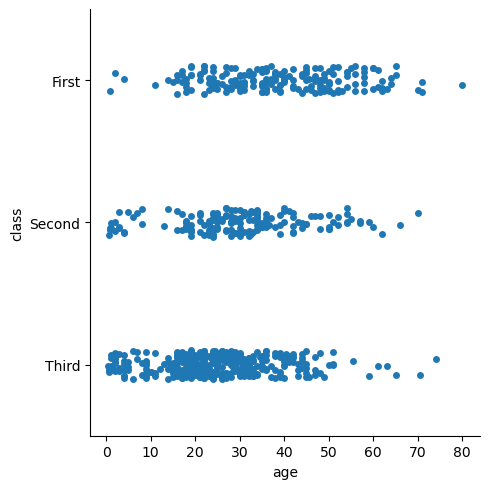

In [2]:
#creating a jittered strip plot and catplot
import seaborn as sns
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class")

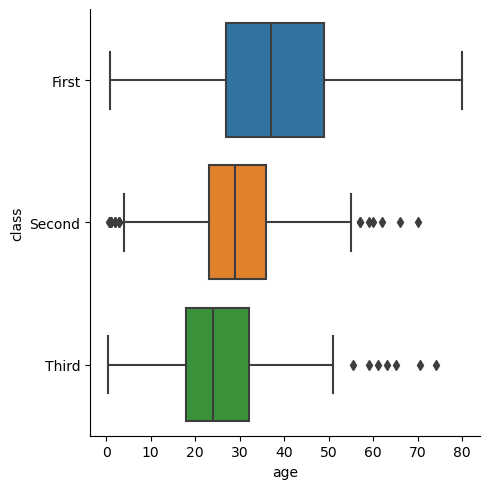

In [3]:
sns.catplot(data=df, x="age", y="class", kind="box")

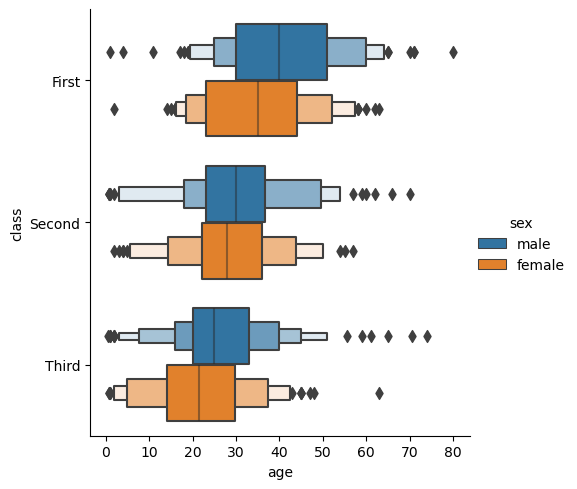

In [4]:
#the legend will be automatically placed outside the plot
sns.catplot(data=df, x="age", y="class", hue="sex", kind="boxen")

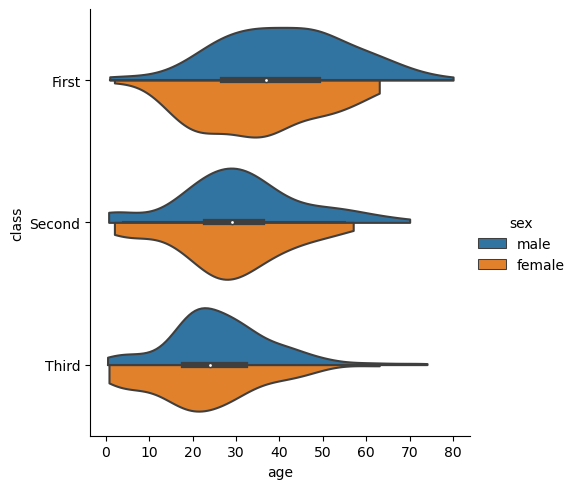

In [5]:
#Additional keyword arguments get passed through to the underlying seaborn function
sns.catplot(
    data=df, x="age", y="class", hue="sex",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

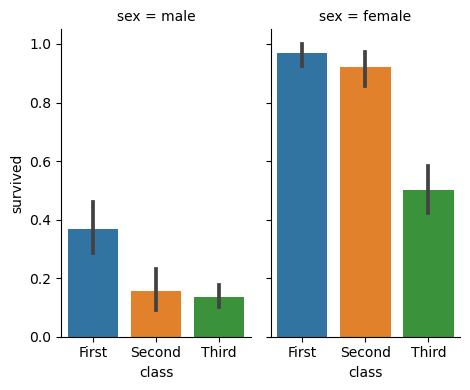

In [6]:
#Assigning a variable to col or row will automatically create subplots. 
#Control figure size with the height and aspect parameters
sns.catplot(
    data=df, x="class", y="survived", col="sex",
    kind="bar", height=4, aspect=.6,
)

<Axes: xlabel='age', ylabel='class'>

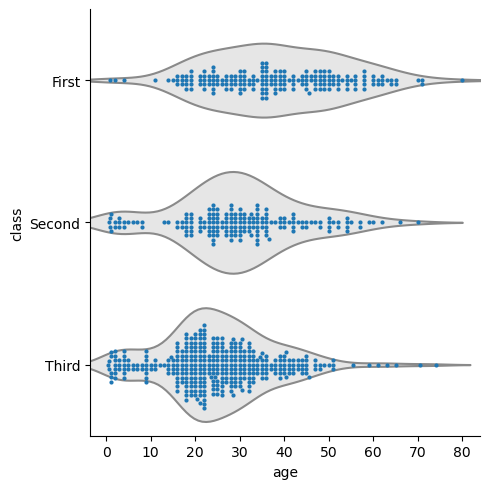

In [7]:
#creating a violin plot
sns.catplot(data=df, x="age", y="class", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="age", y="class", size=3)

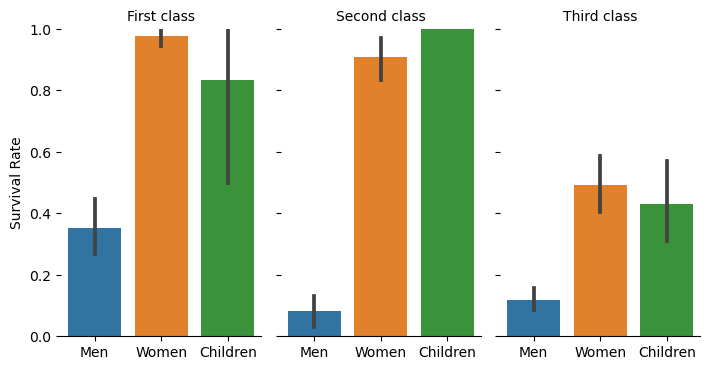

In [8]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

In [14]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

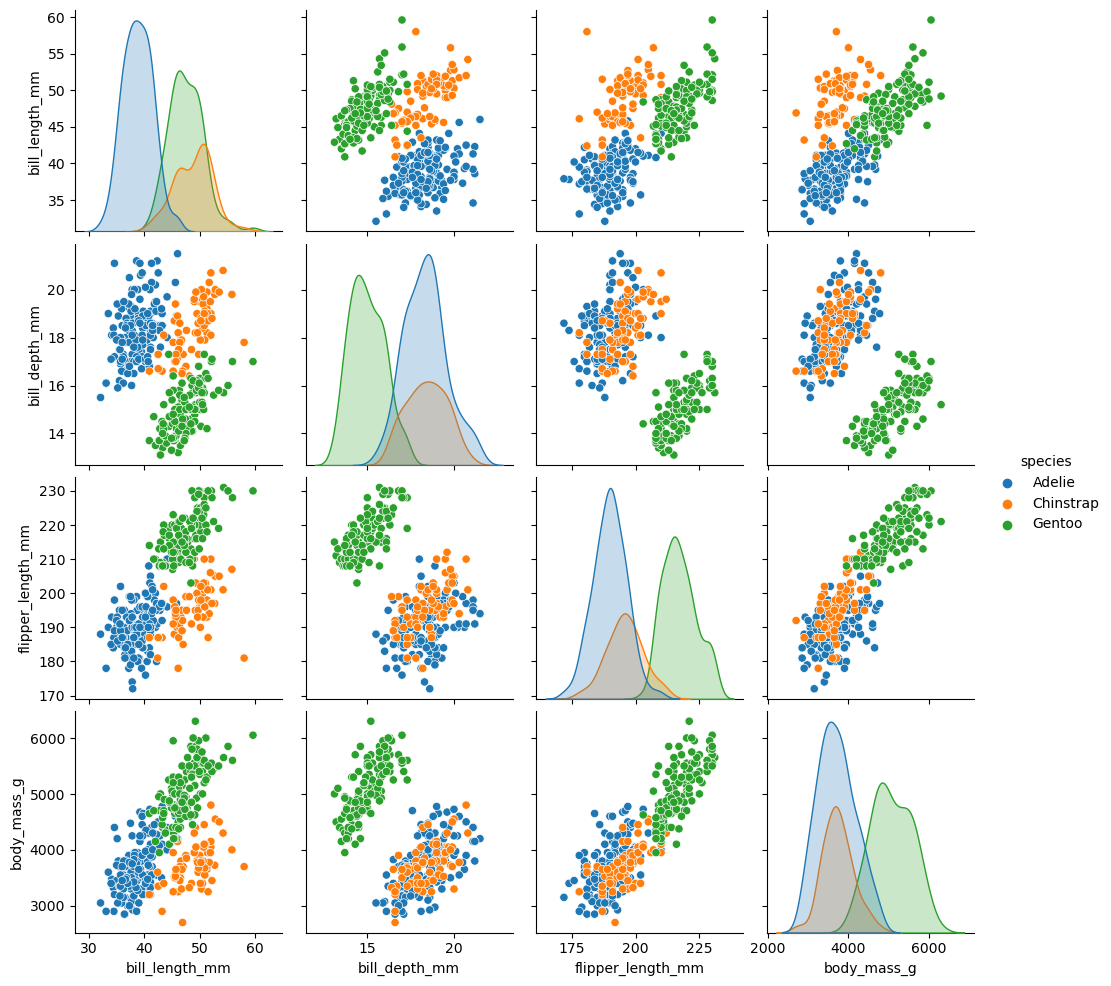

In [18]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [19]:
import matplotlib.pyplot as plt
plt.show()

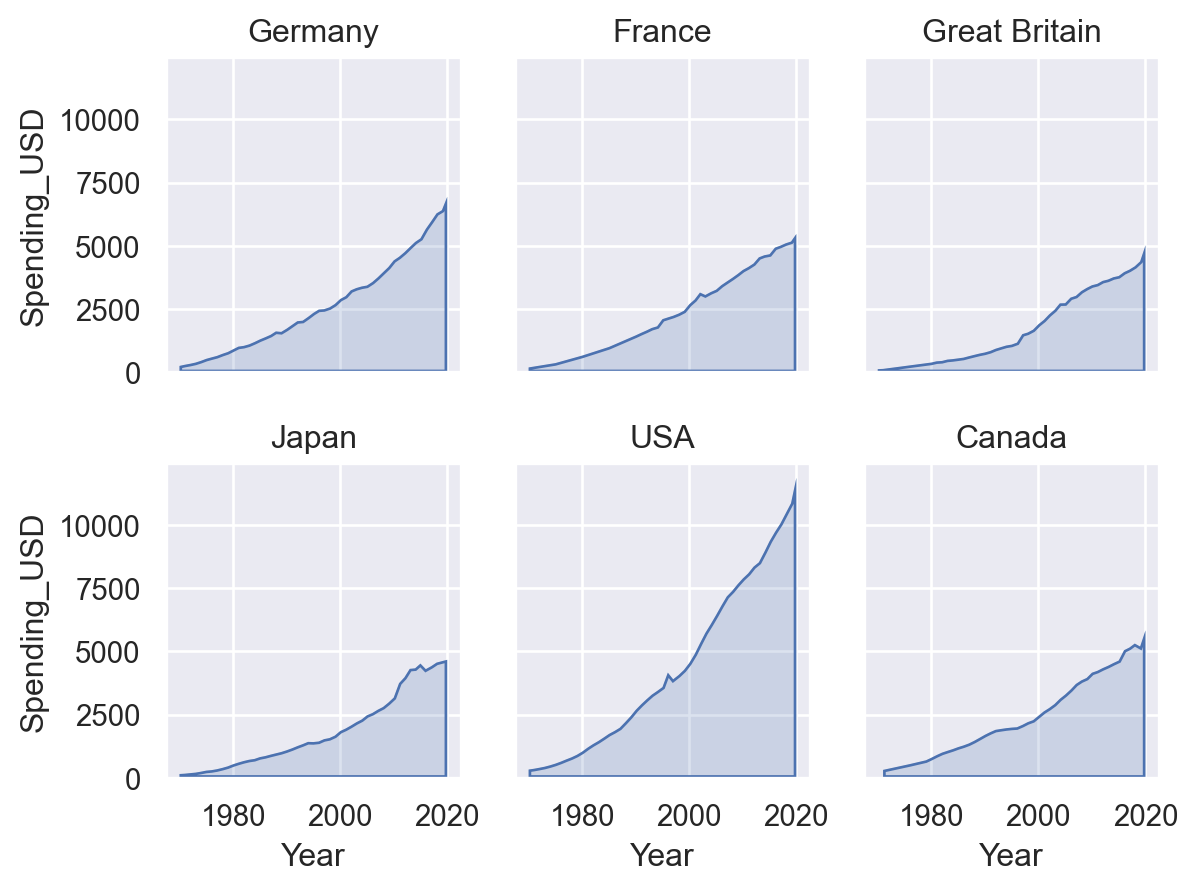

In [24]:
#creating seaborn object area
df = sns.load_dataset("healthexp")
p = so.Plot(df, "Year", "Spending_USD").facet("Country", wrap=3)
p.add(so.Area())

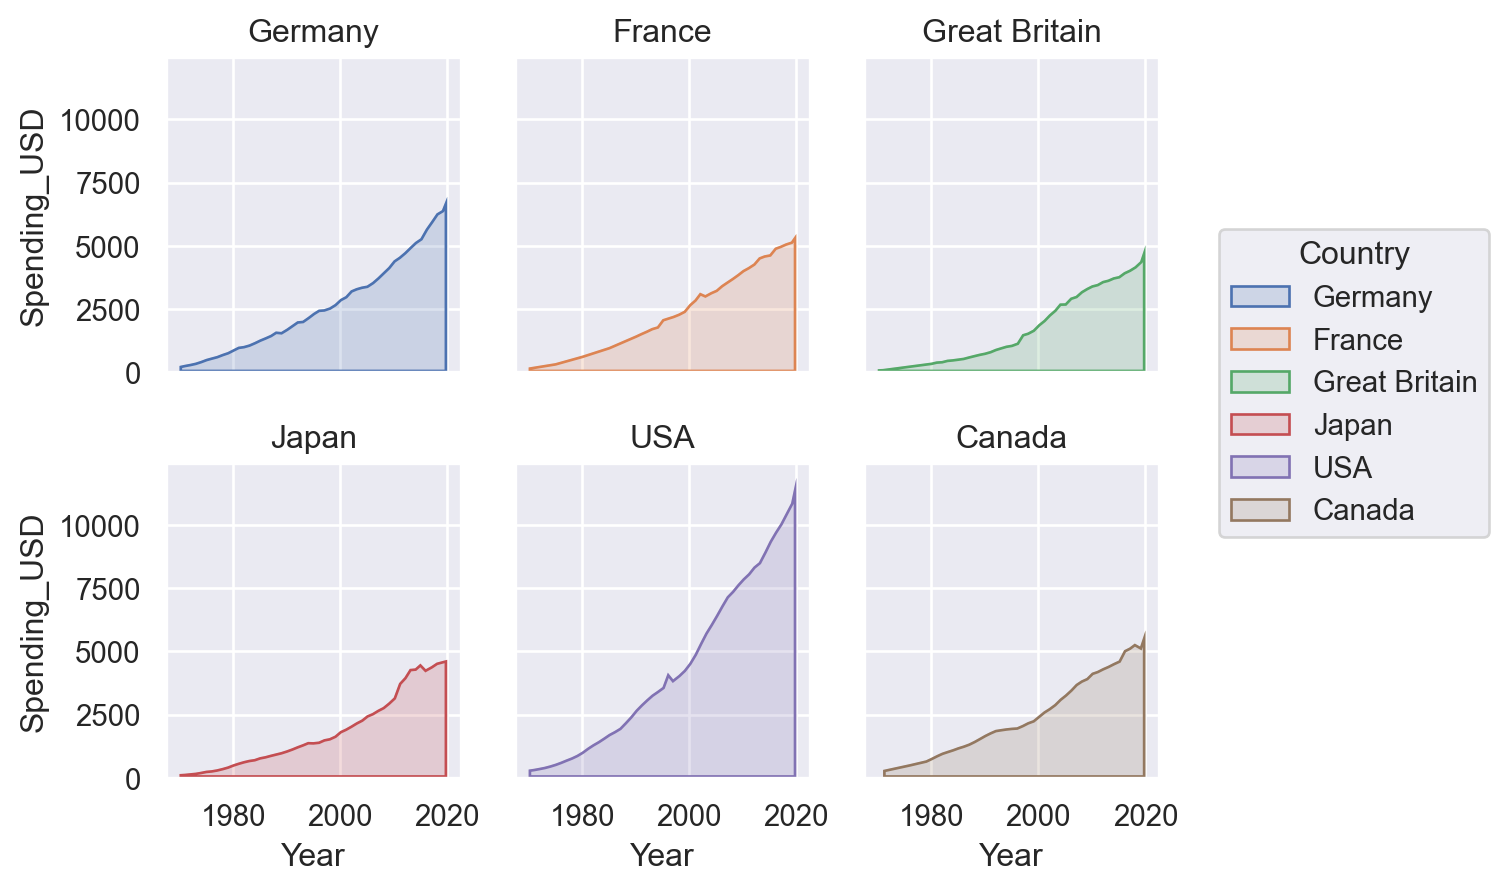

In [25]:
#adding color properties
p.add(so.Area(), color="Country")

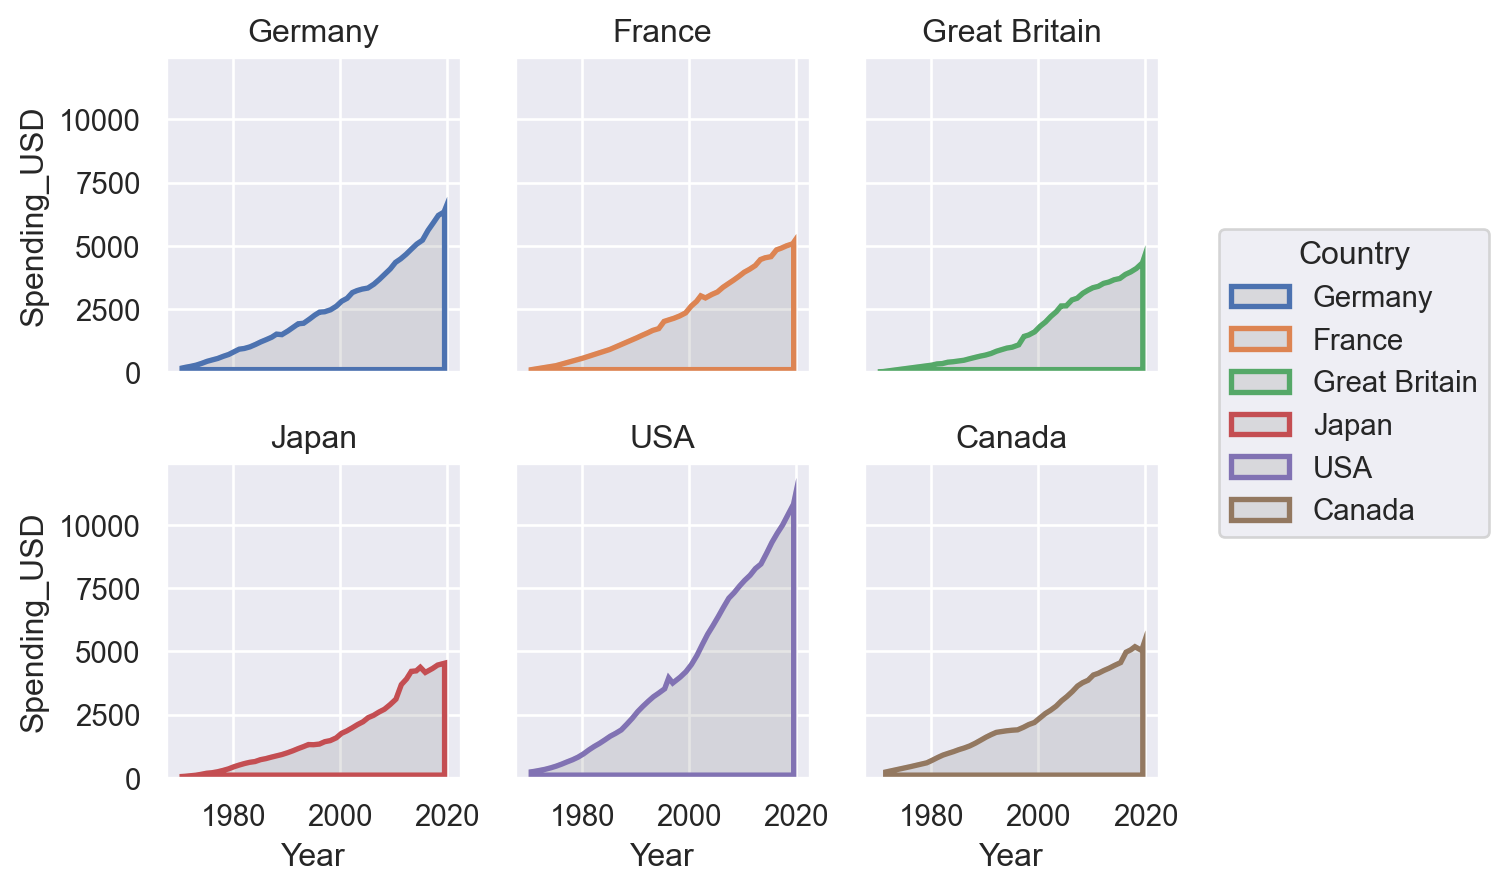

In [26]:
#trying to map only the edgecolor
p.add(so.Area(color=".5", edgewidth=2), edgecolor="Country")

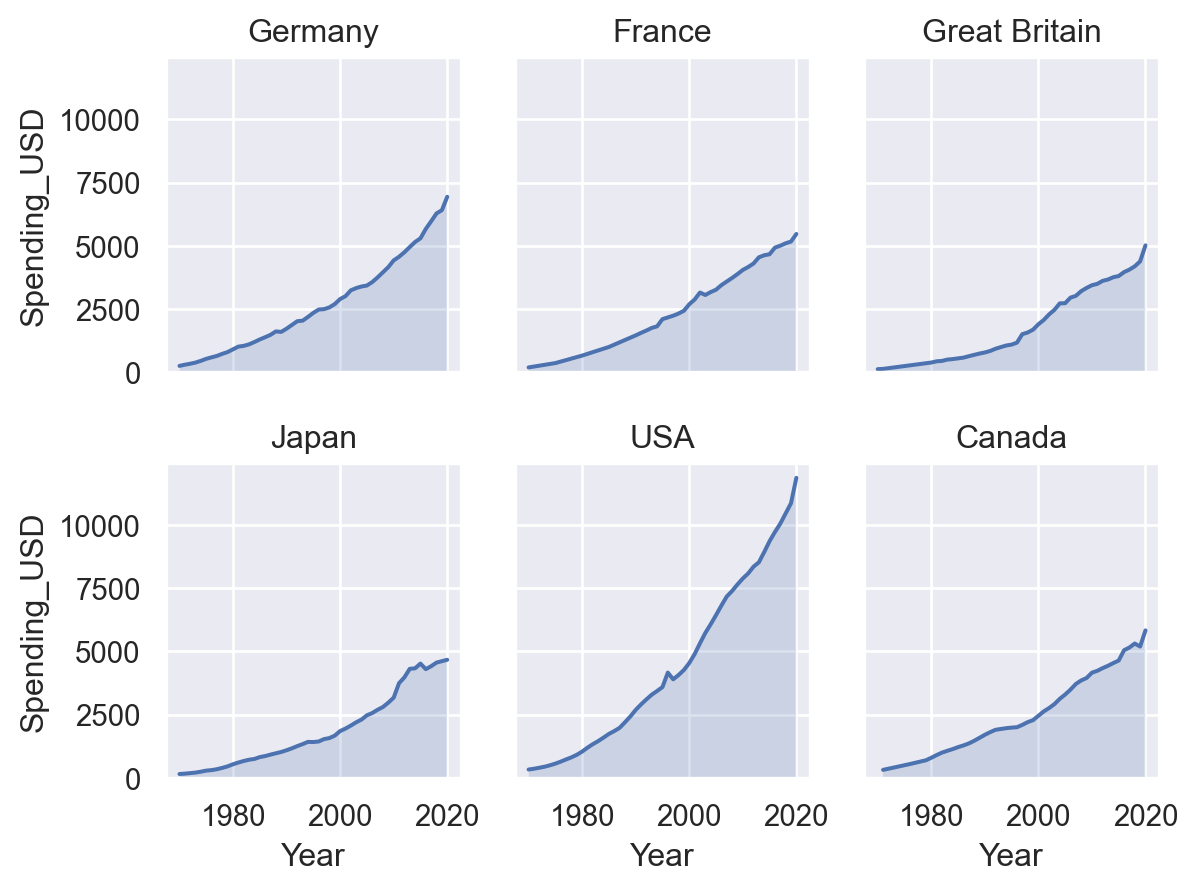

In [27]:
#The mark is drawn as a polygon, but it can be combined with Line 
#to draw a shaded region by setting edgewidth=0
p.add(so.Area(edgewidth=0)).add(so.Line())

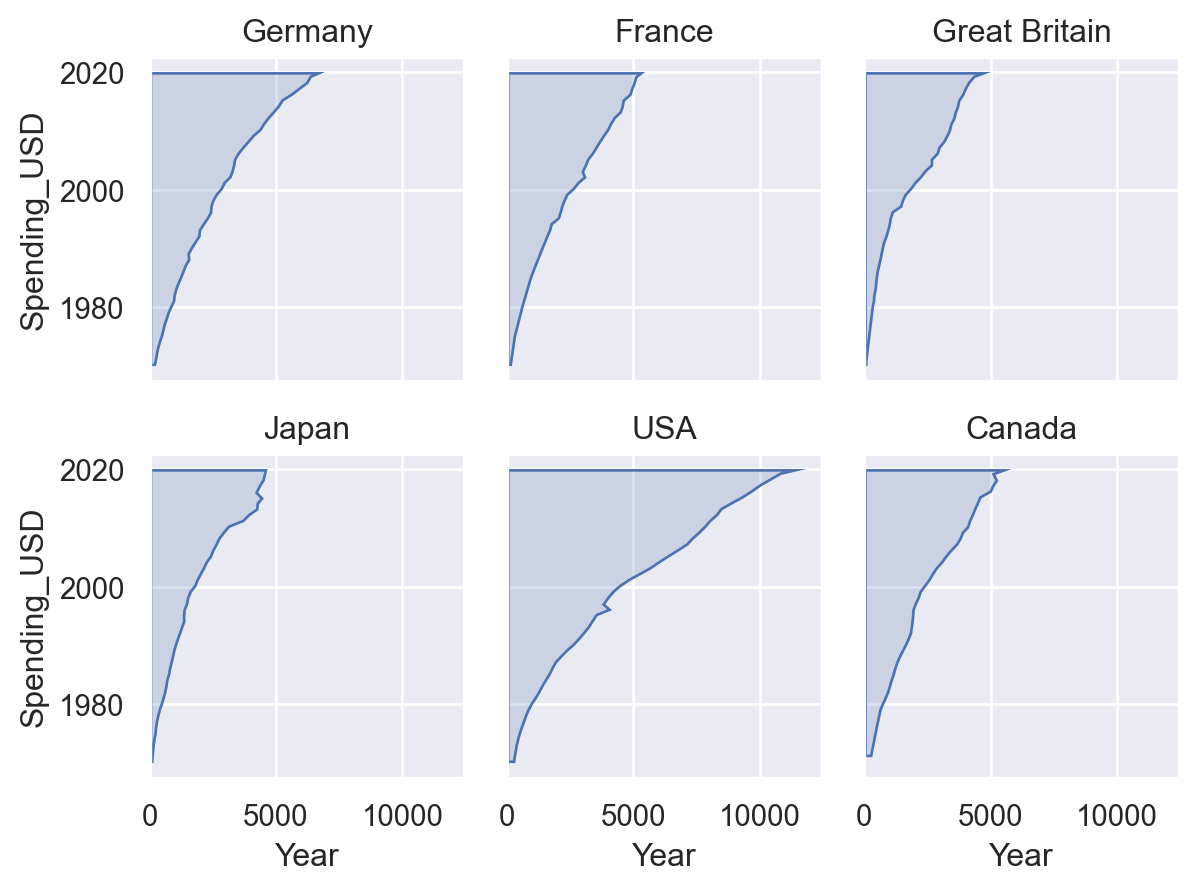

In [28]:
p.add(so.Area(), x="Spending_USD", y="Year", orient="y")

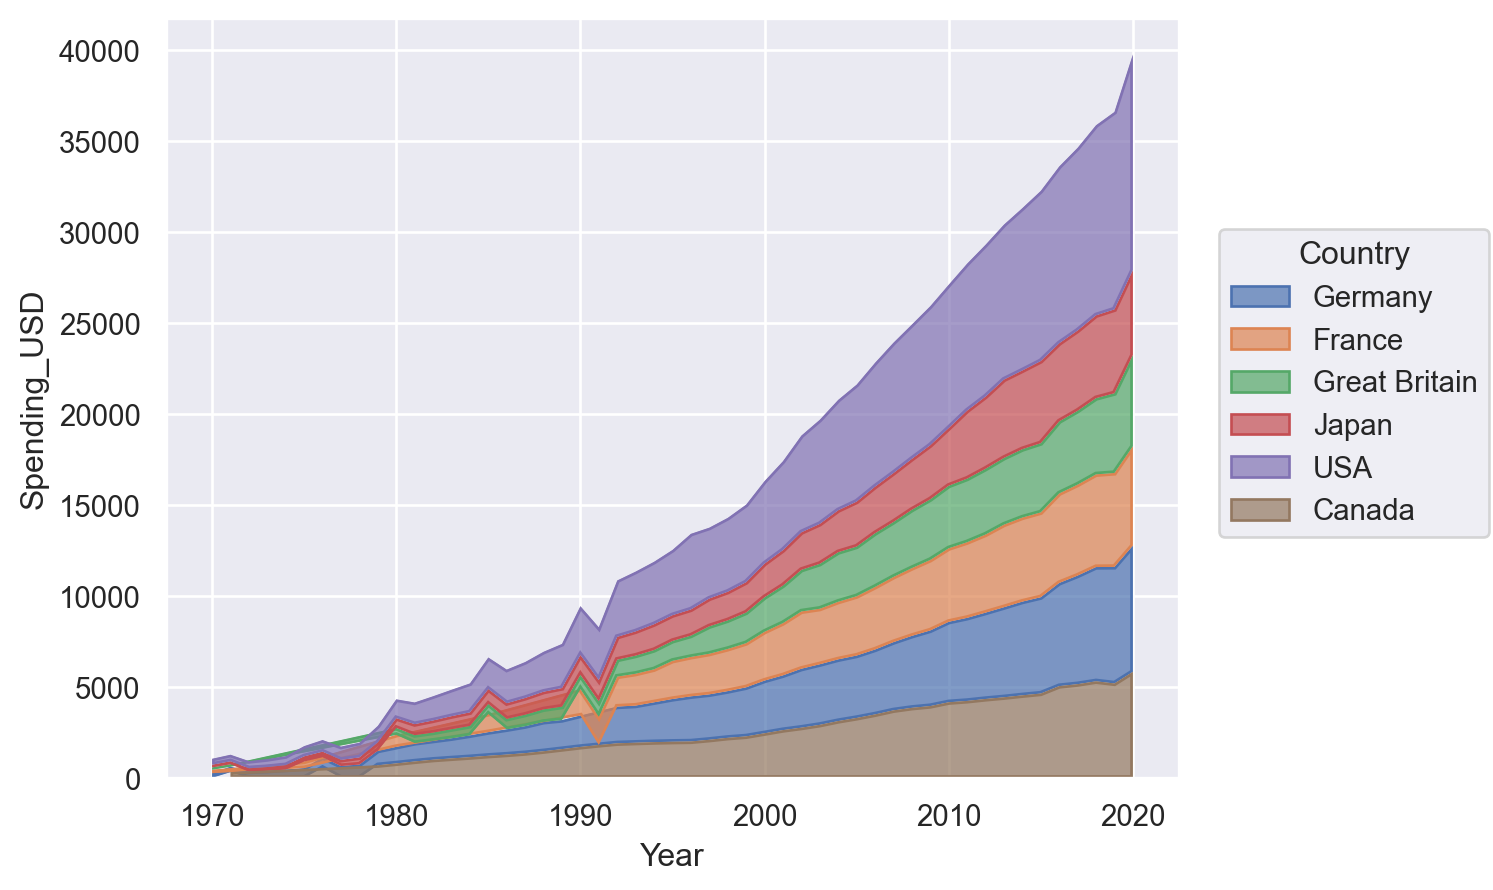

In [30]:
(
    so.Plot(df, "Year", "Spending_USD", color="Country")
    .add(so.Area(alpha=.7), so.Stack())
)

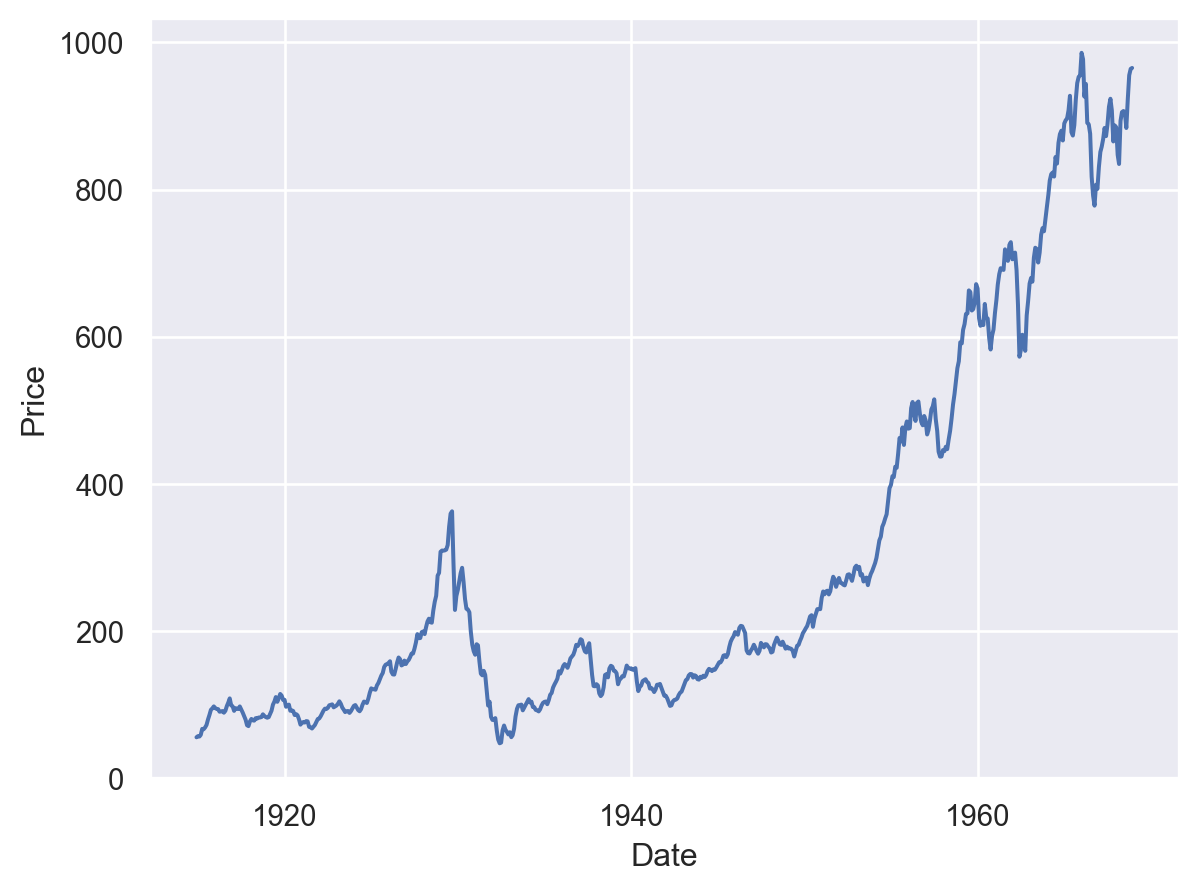

In [31]:
#creating a seaborn Line plot
df = sns.load_dataset("dowjones")
so.Plot(df, "Date", "Price").add(so.Line())

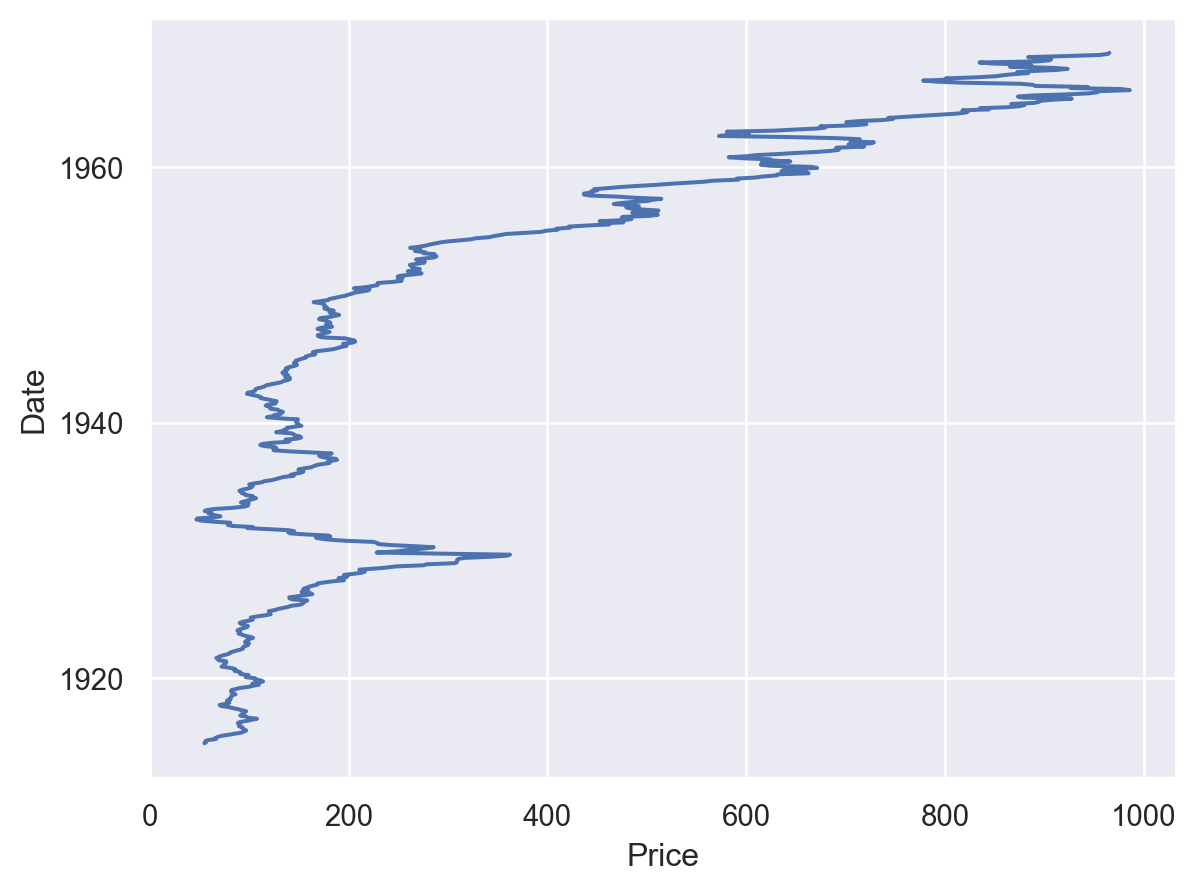

In [32]:
so.Plot(df, x="Price", y="Date").add(so.Line(), orient="y")

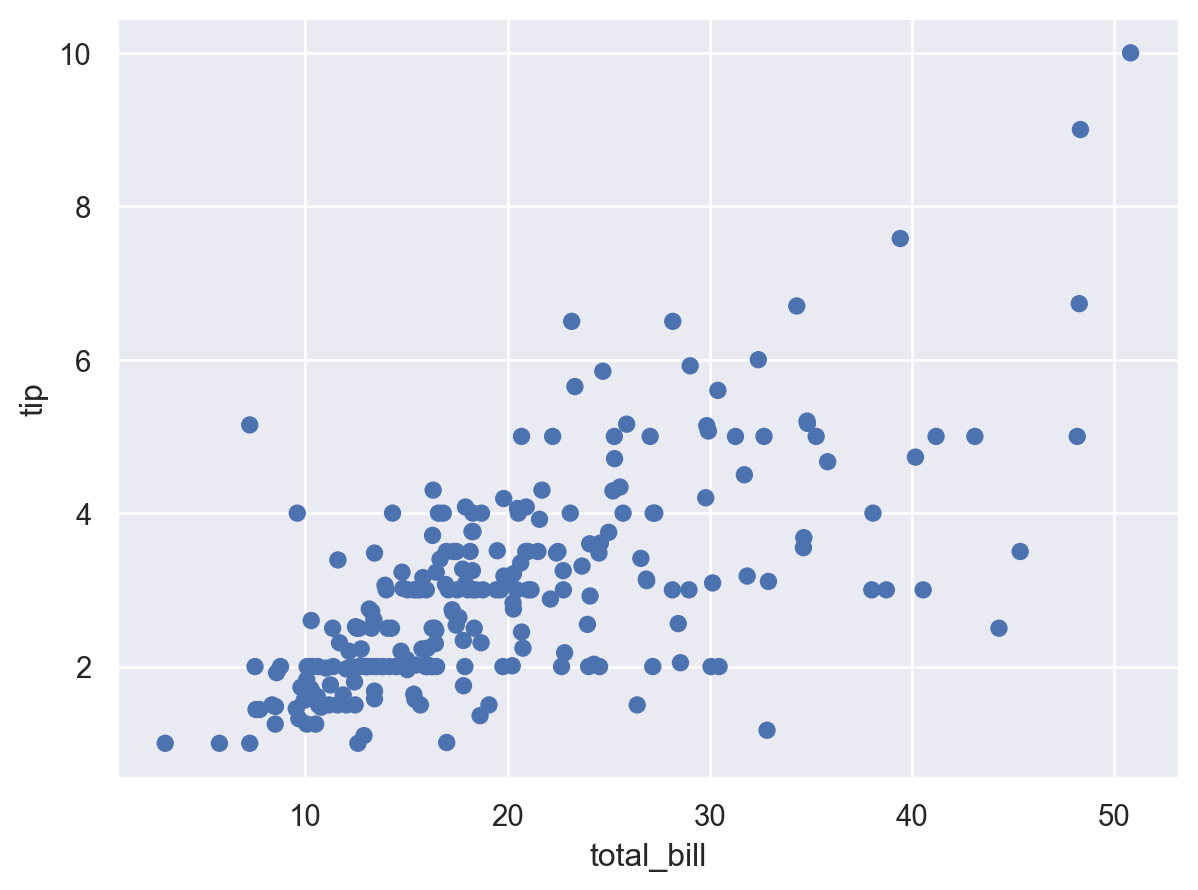

In [35]:
#creating a seaborn Dot plot
df = sns.load_dataset("tips")
p1 = so.Plot(df, "total_bill", "tip")
p1.add(so.Dot())

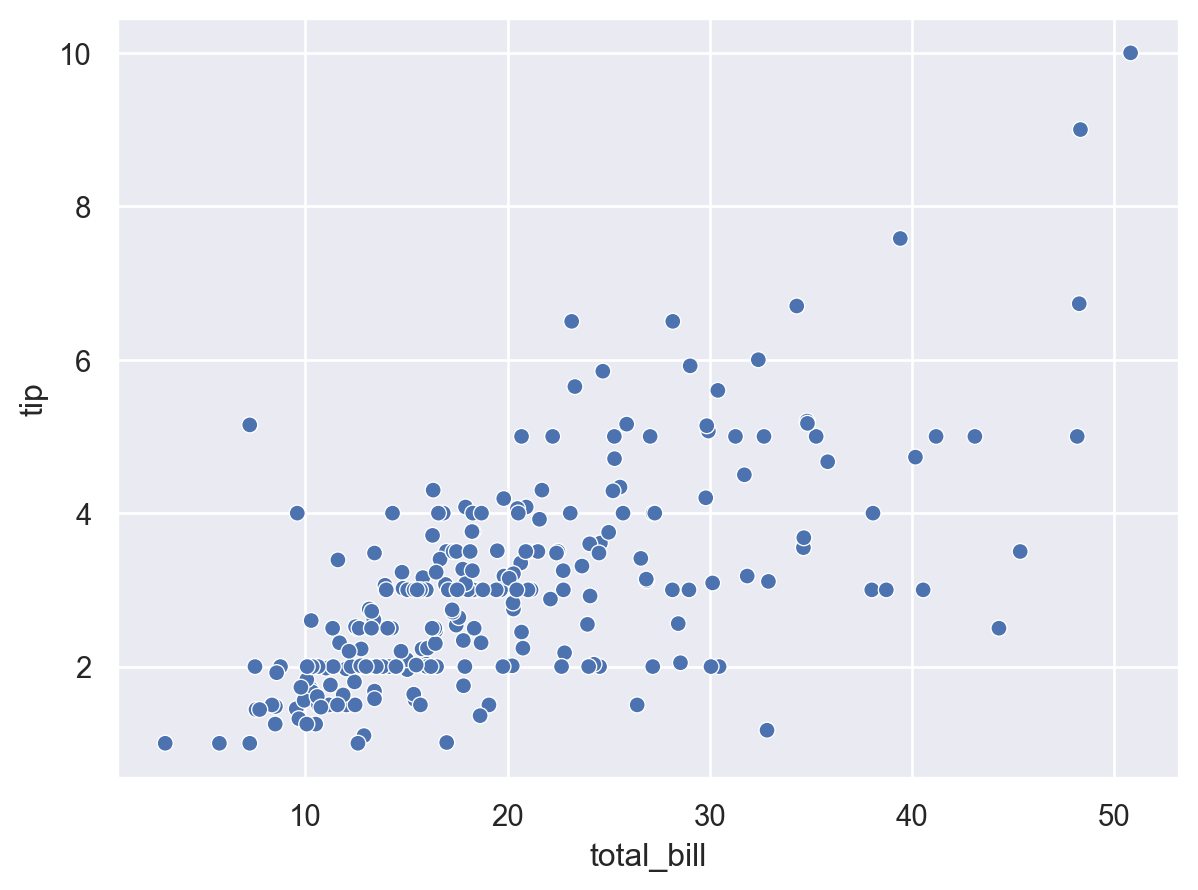

In [36]:
#While Dots is a better choice for dense scatter plots, 
#adding a thin edge can help to resolve individual points:
p1.add(so.Dot(edgecolor="w"))

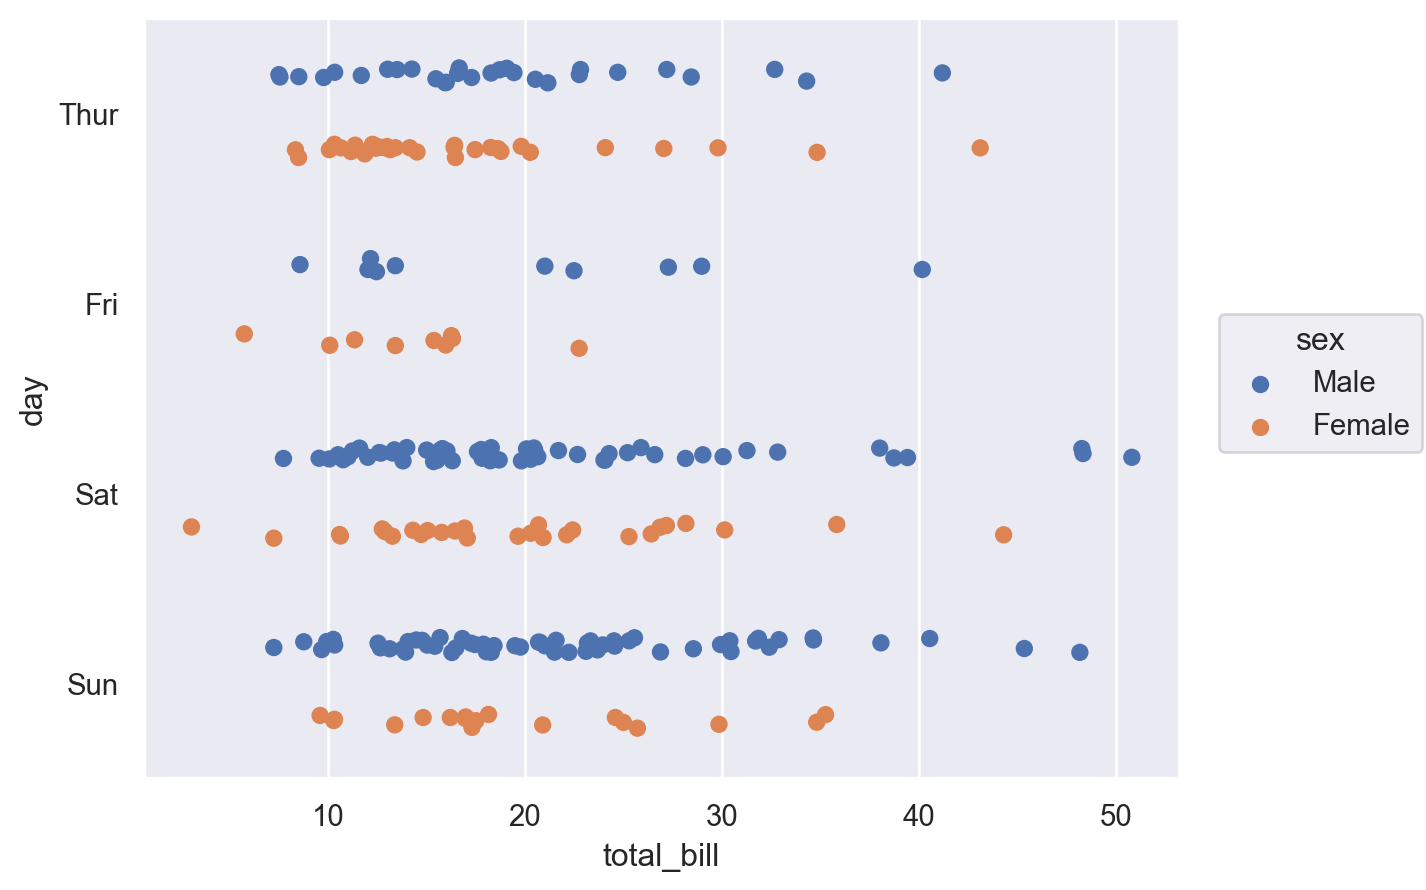

In [37]:
#Dodging and jittering can also help to reduce overplotting, when appropriate
(
    so.Plot(df, "total_bill", "day", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.2))
)

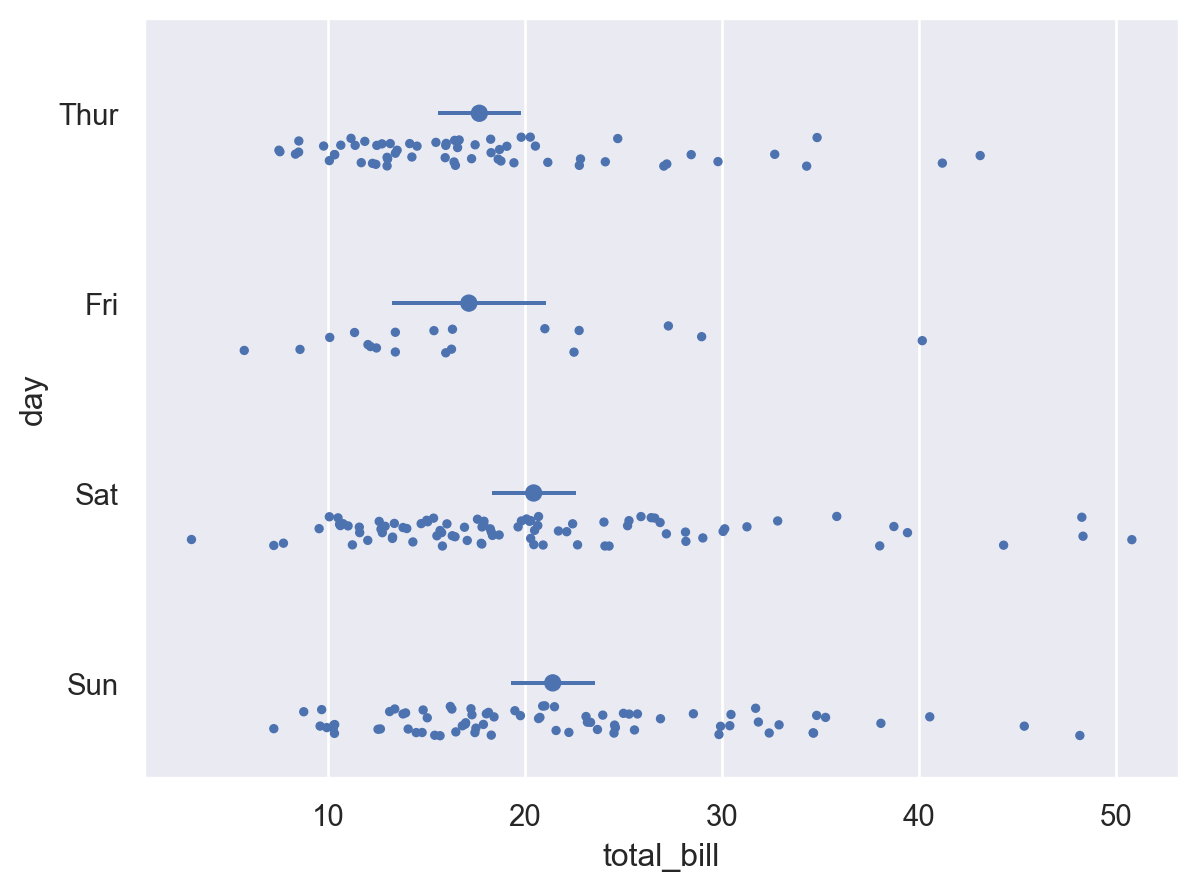

In [39]:
#Combine with Range to show error bars
(
    so.Plot(df, x="total_bill", y="day")
    .add(so.Dot(pointsize=3), so.Shift(y=.2), so.Jitter(.2))
    .add(so.Dot(), so.Agg())
    .add(so.Range(), so.Est(errorbar=("se", 2)))
)

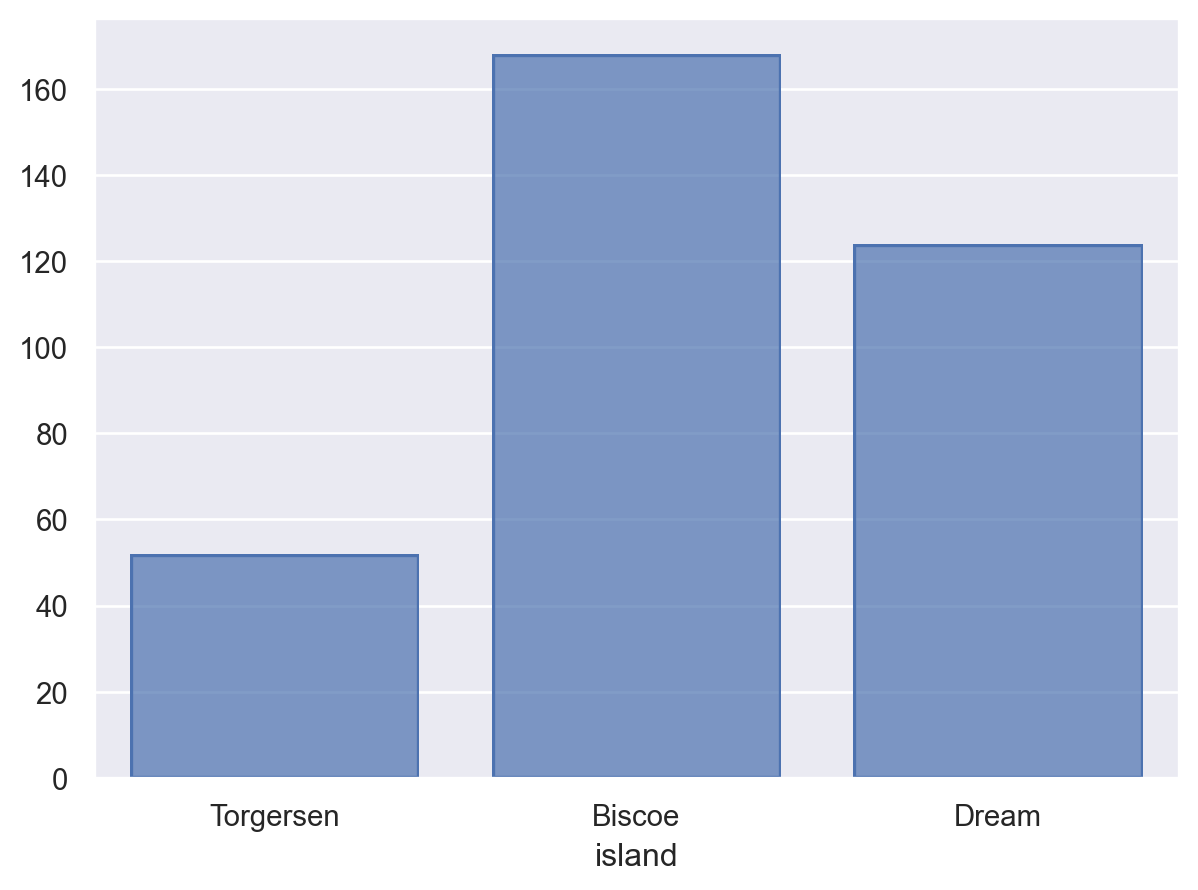

In [41]:
#creating Histogram
df = sns.load_dataset("penguins")
so.Plot(df, "island").add(so.Bar(), so.Hist())

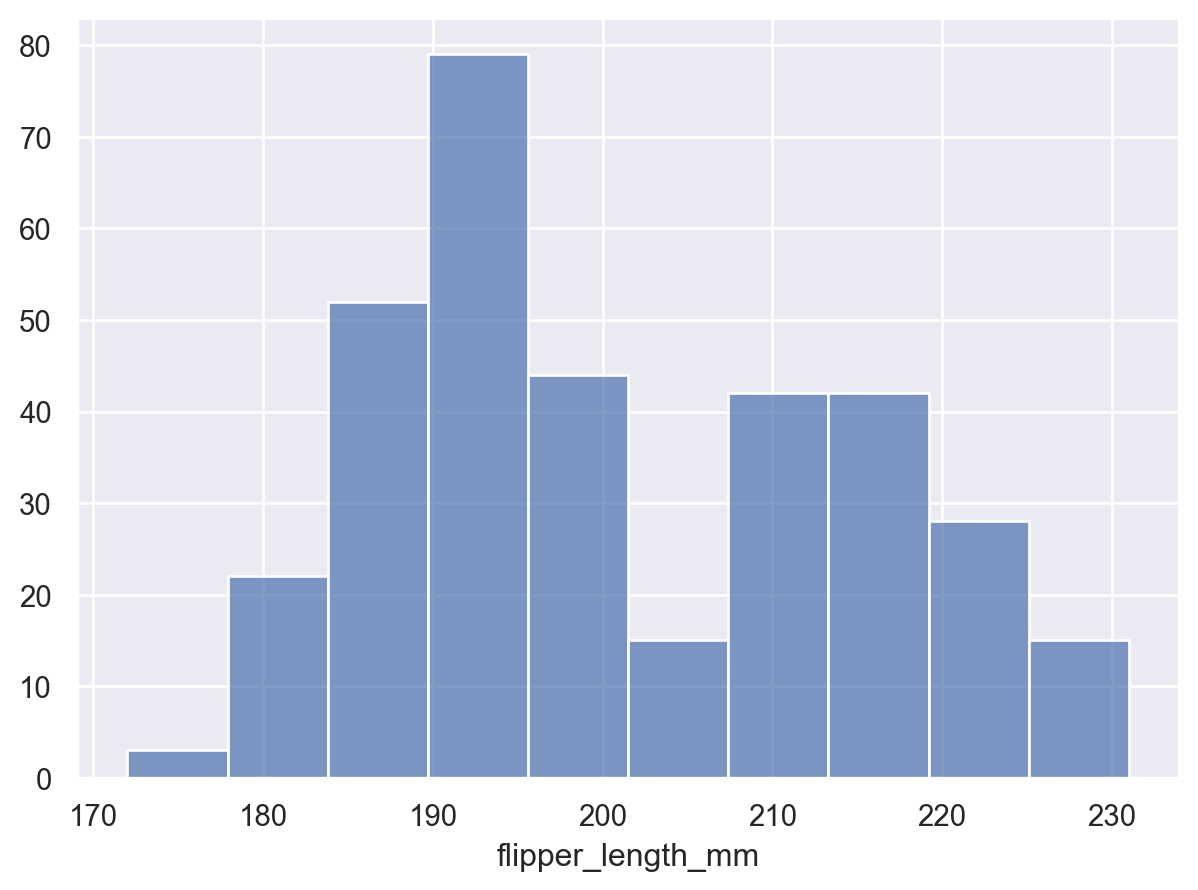

In [42]:
#When used to estimate a univariate distribution, it is better to use the Bars mark
p = so.Plot(df, "flipper_length_mm")
p.add(so.Bars(), so.Hist())

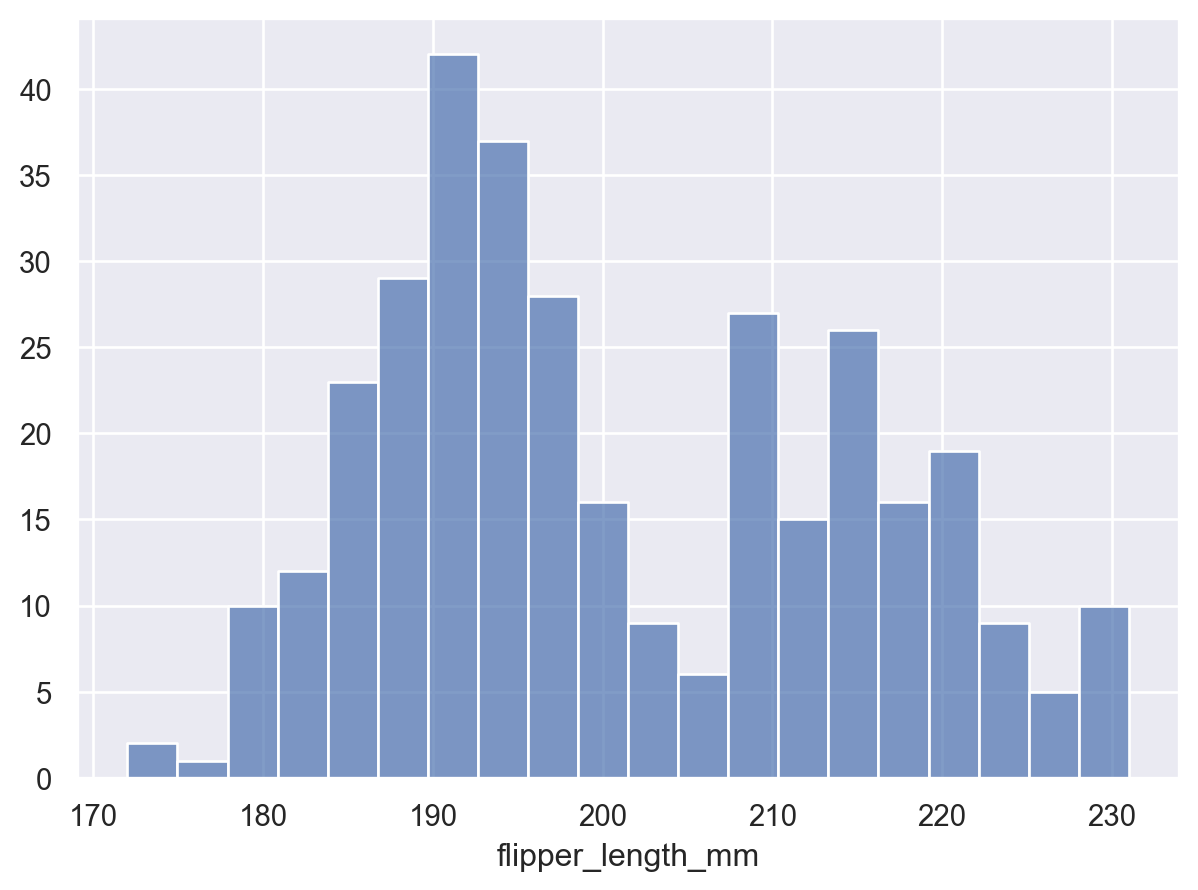

In [43]:
#Adjusting the granularity by setting the total number
p.add(so.Bars(), so.Hist(bins=20))

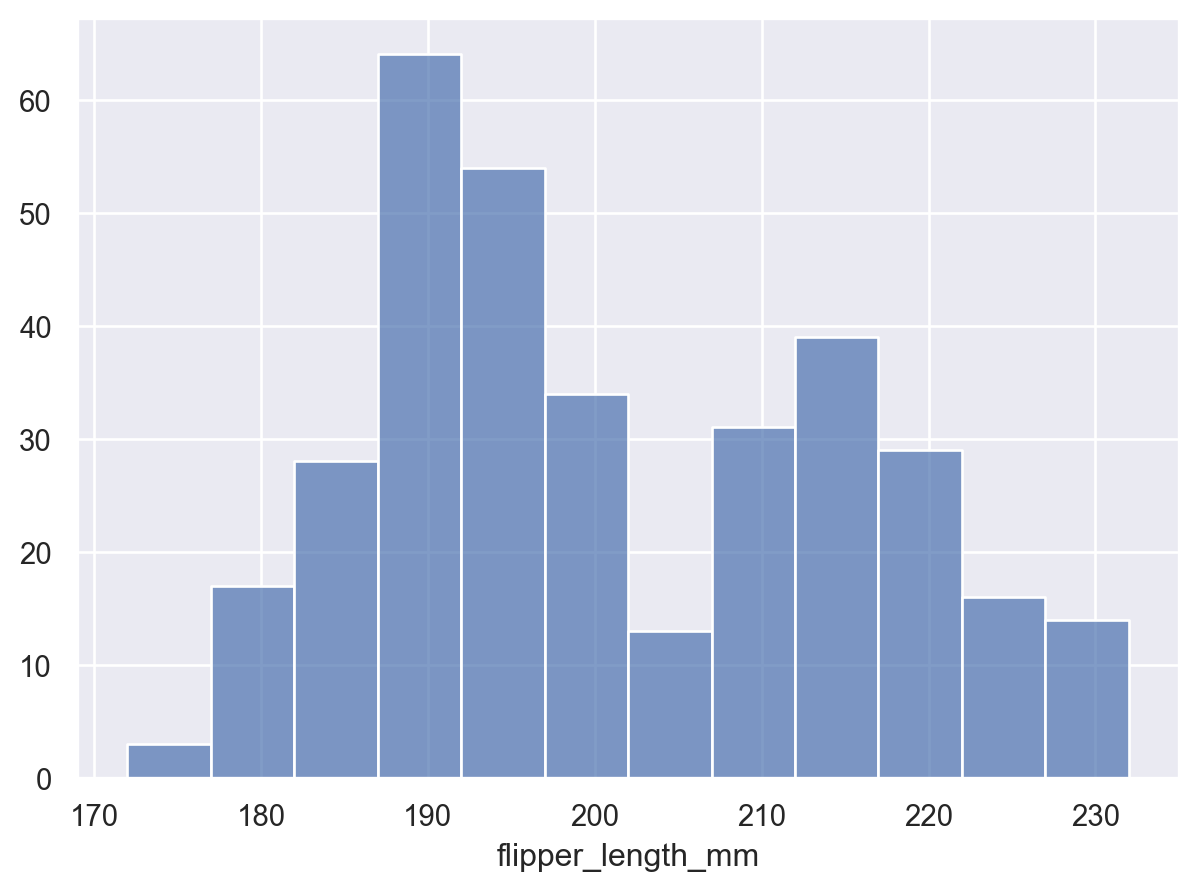

In [44]:
#specifying the width of the bins
p.add(so.Bars(), so.Hist(binwidth=5))

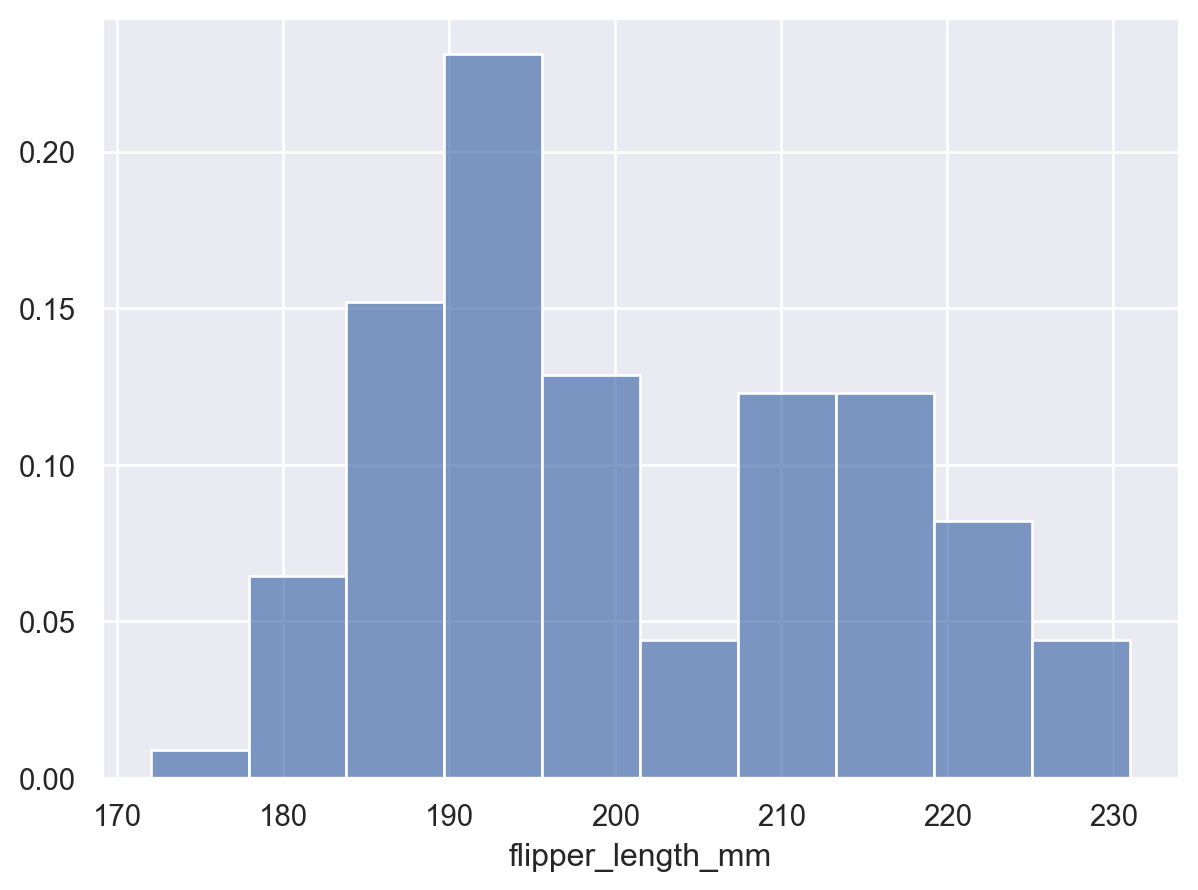

In [45]:
#normalizing the counts to show the proportions
p.add(so.Bars(), so.Hist(stat="proportion"))

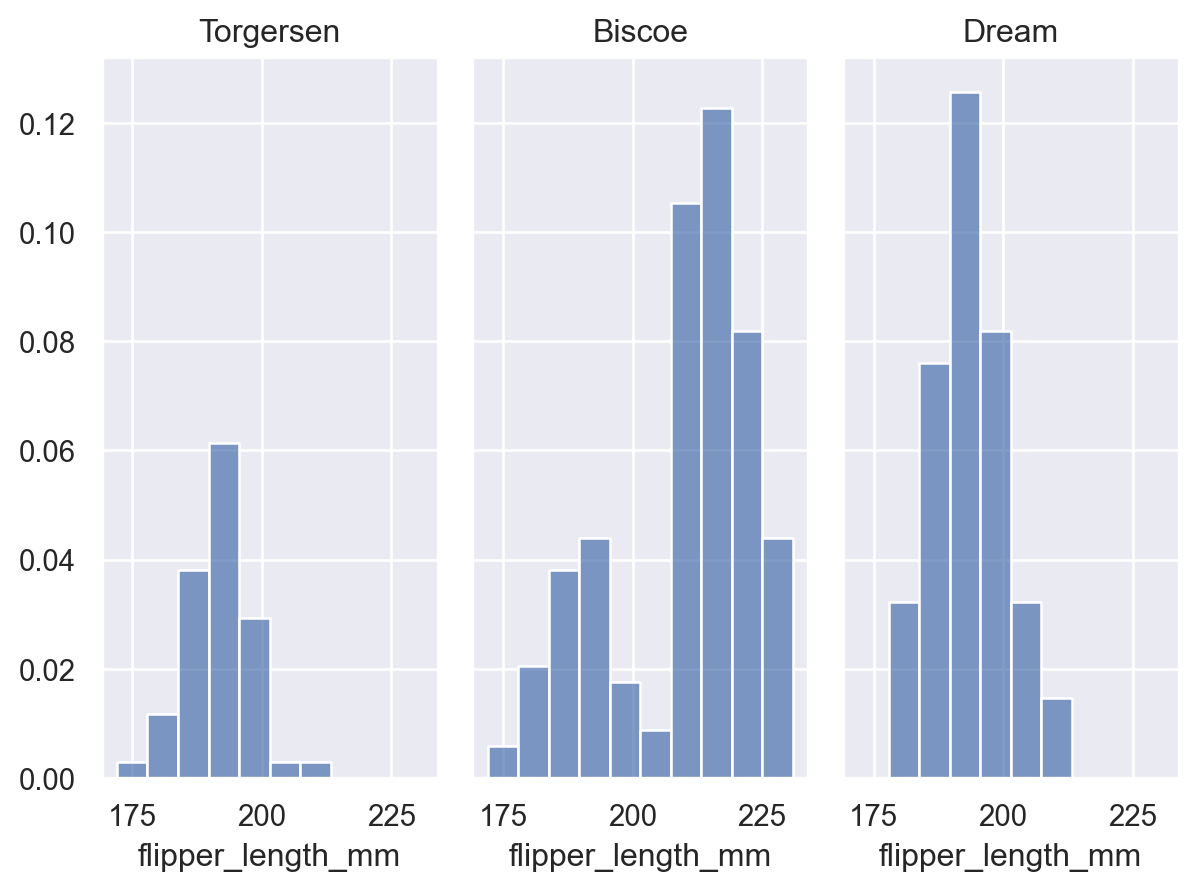

In [46]:
#When additional variables define groups, the default behavior is to normalize across all groups
p = p.facet("island")
p.add(so.Bars(), so.Hist(stat="proportion"))

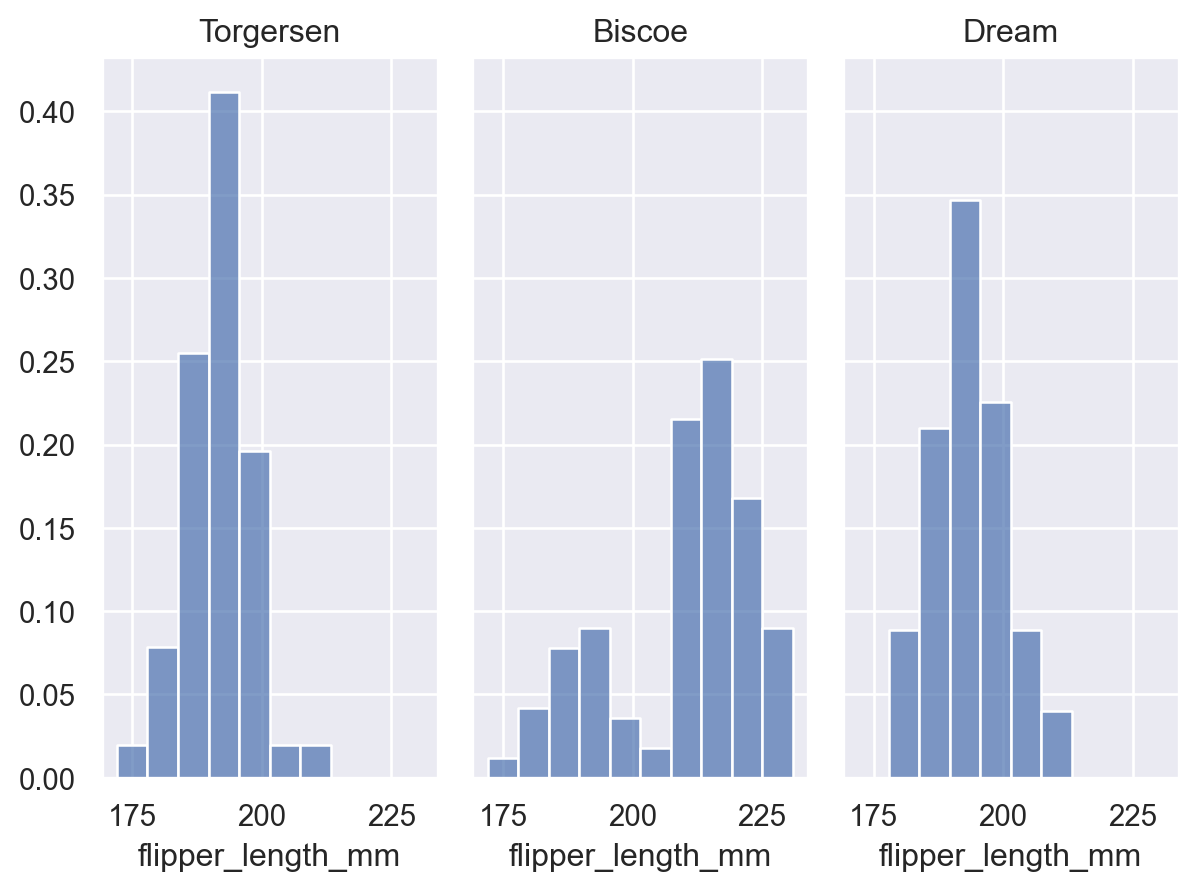

In [47]:
#Pass common_norm=False to normalize each distribution independently
p.add(so.Bars(), so.Hist(stat="proportion", common_norm=False))

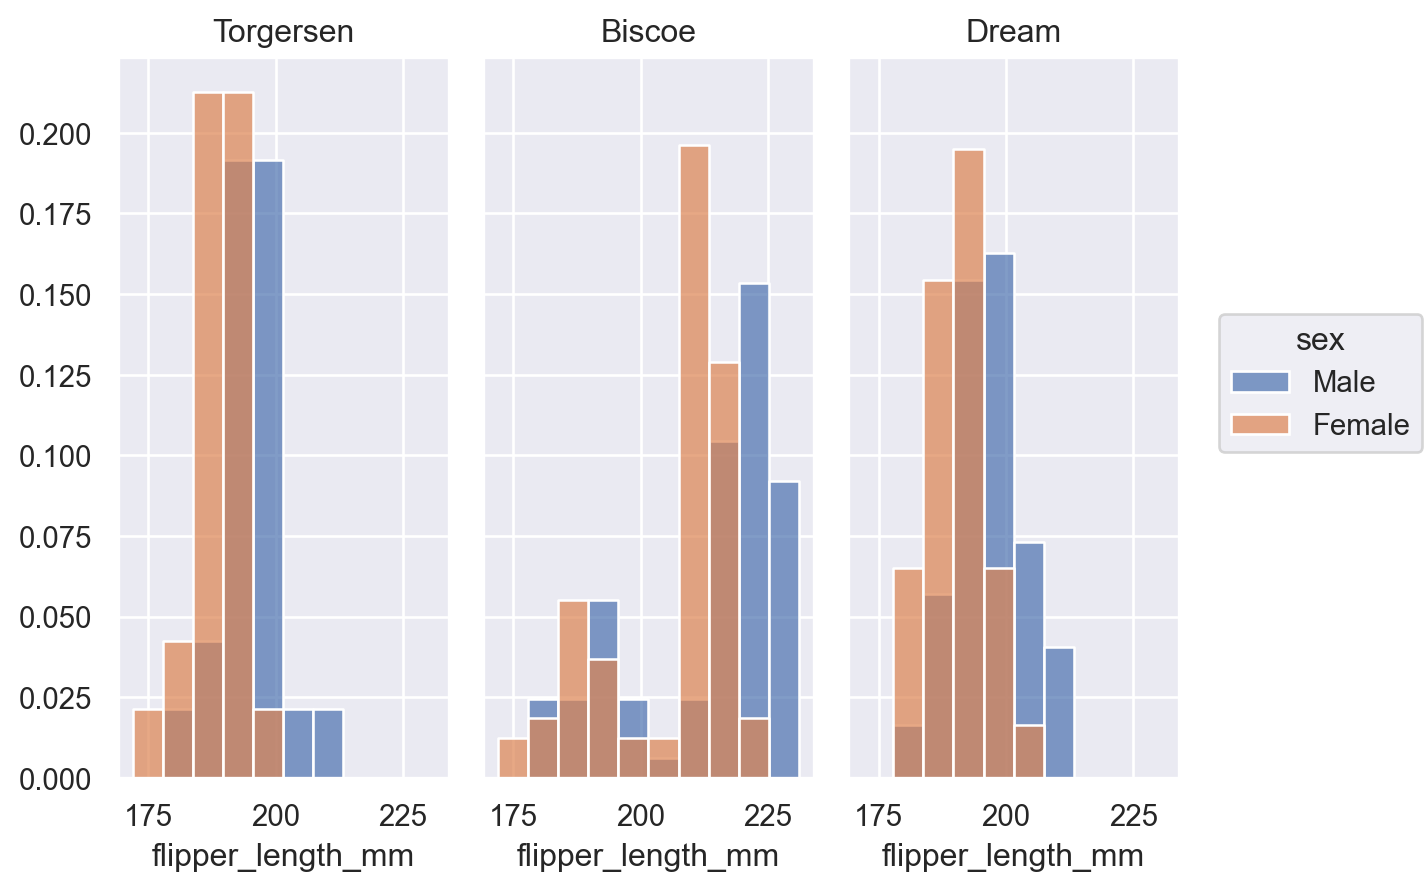

In [48]:
#with more than one grouping varible, specify a subset to normalize within
p.add(so.Bars(), so.Hist(stat="proportion", common_norm=["col"]), color="sex")

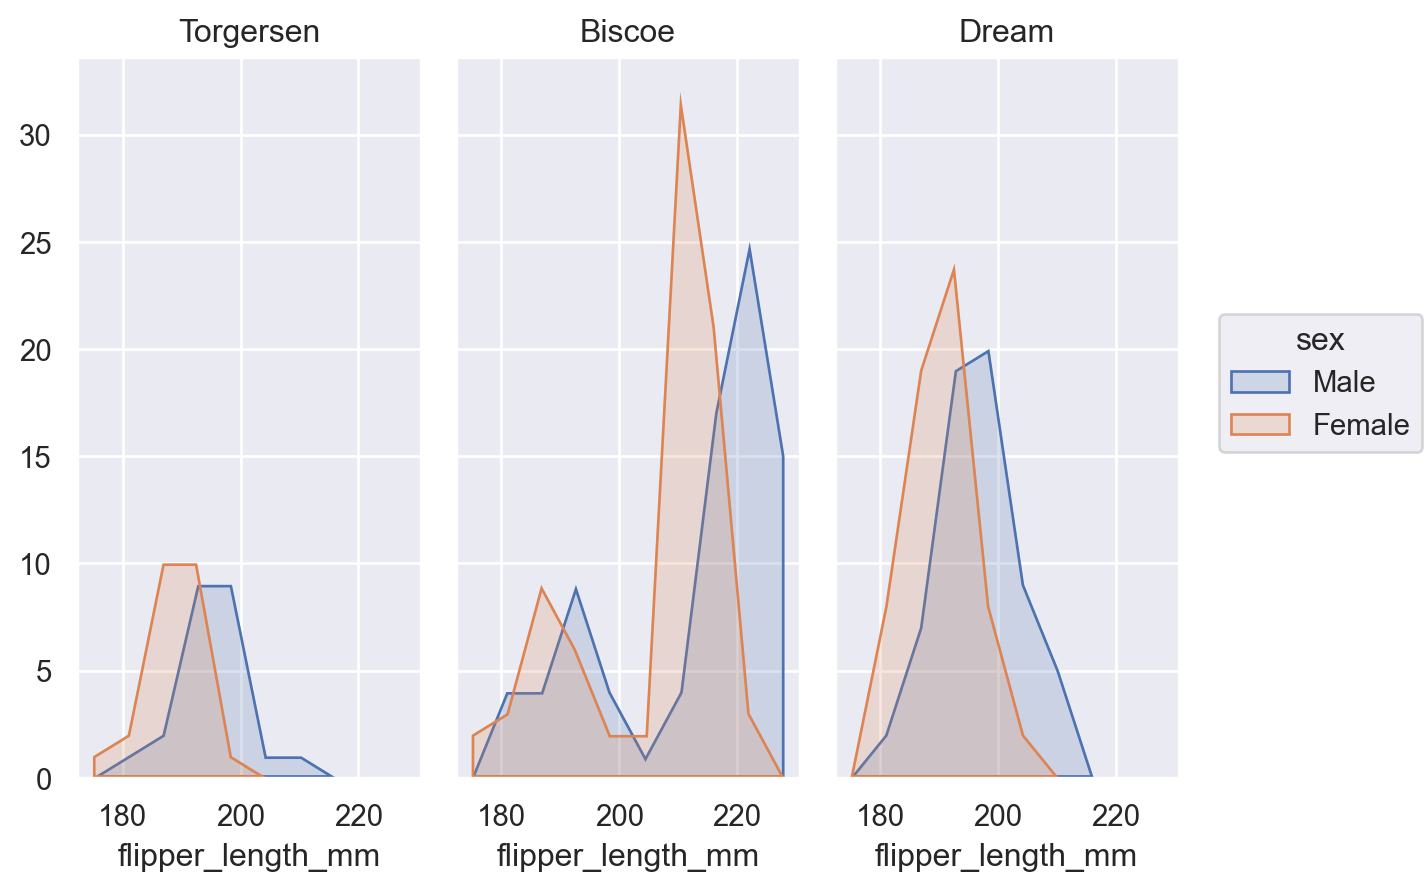

In [49]:
#When distributions overlap it may be easier to discern their shapes with an Area mark
p.add(so.Area(), so.Hist(), color="sex")

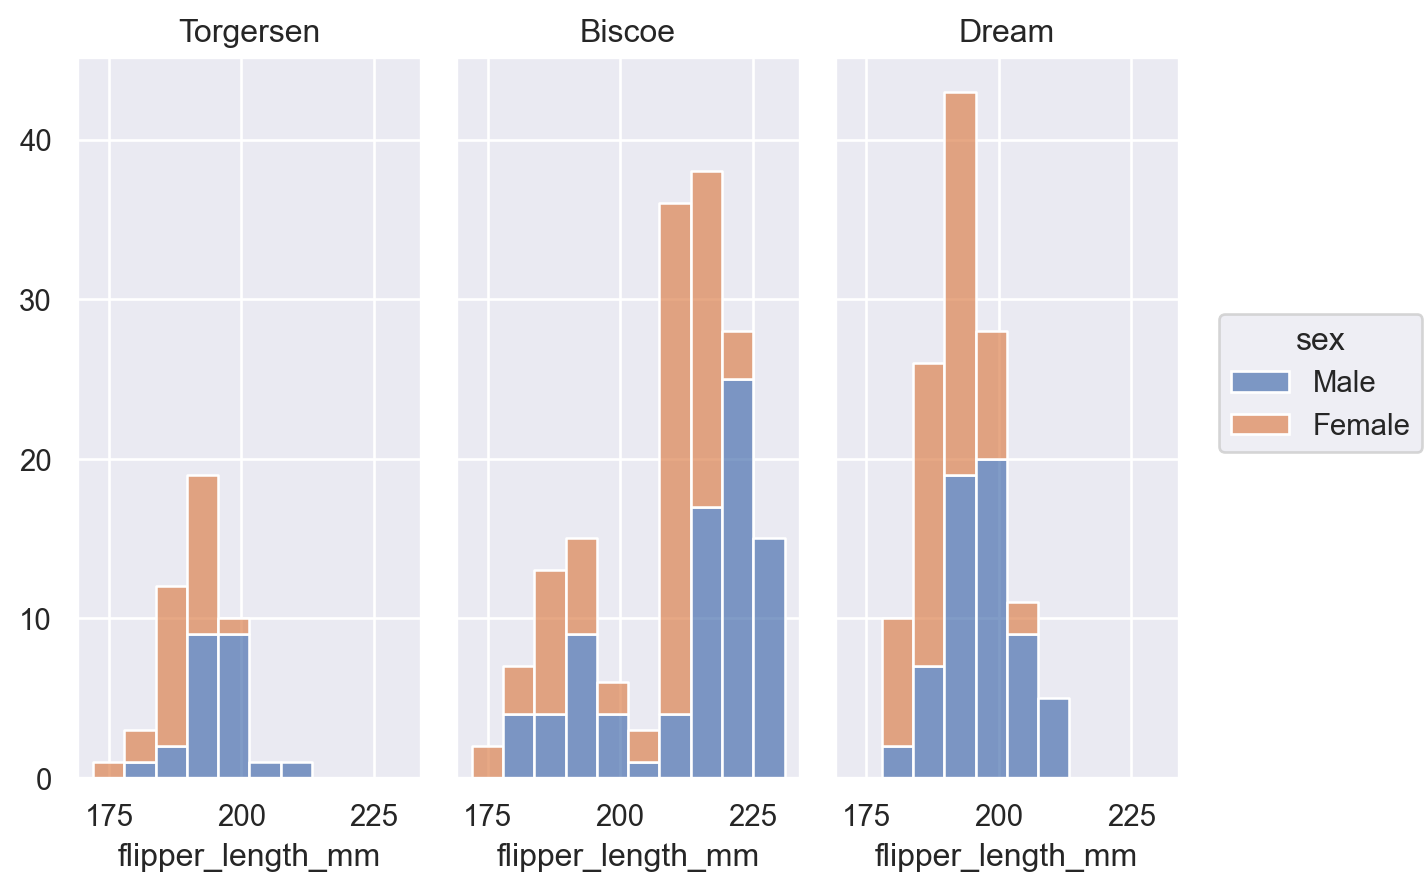

In [50]:
#adding add Stack move to represent a part-whole relationship
p.add(so.Bars(), so.Hist(), so.Stack(), color="sex")

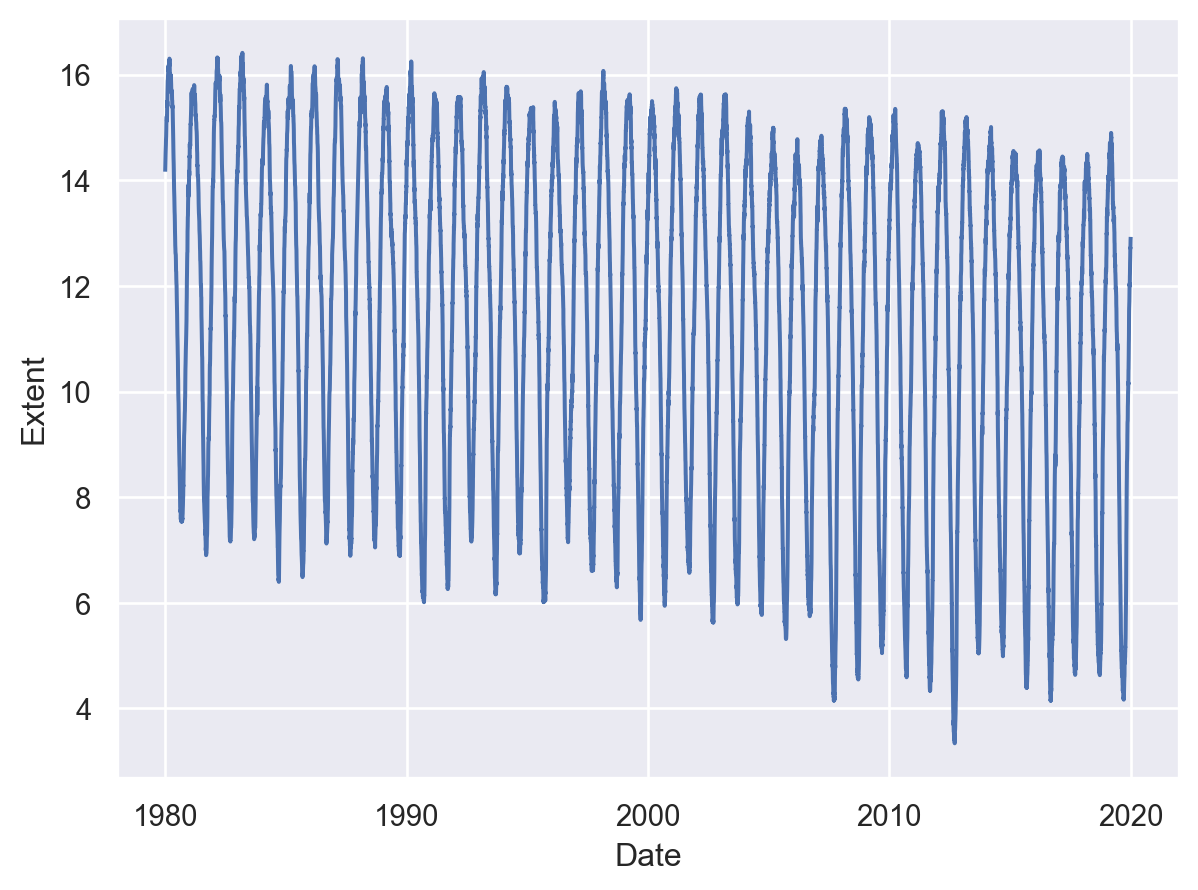

In [52]:
#Creating Seaborn lines
df = sns.load_dataset("seaice")
so.Plot(df, "Date", "Extent").add(so.Lines())

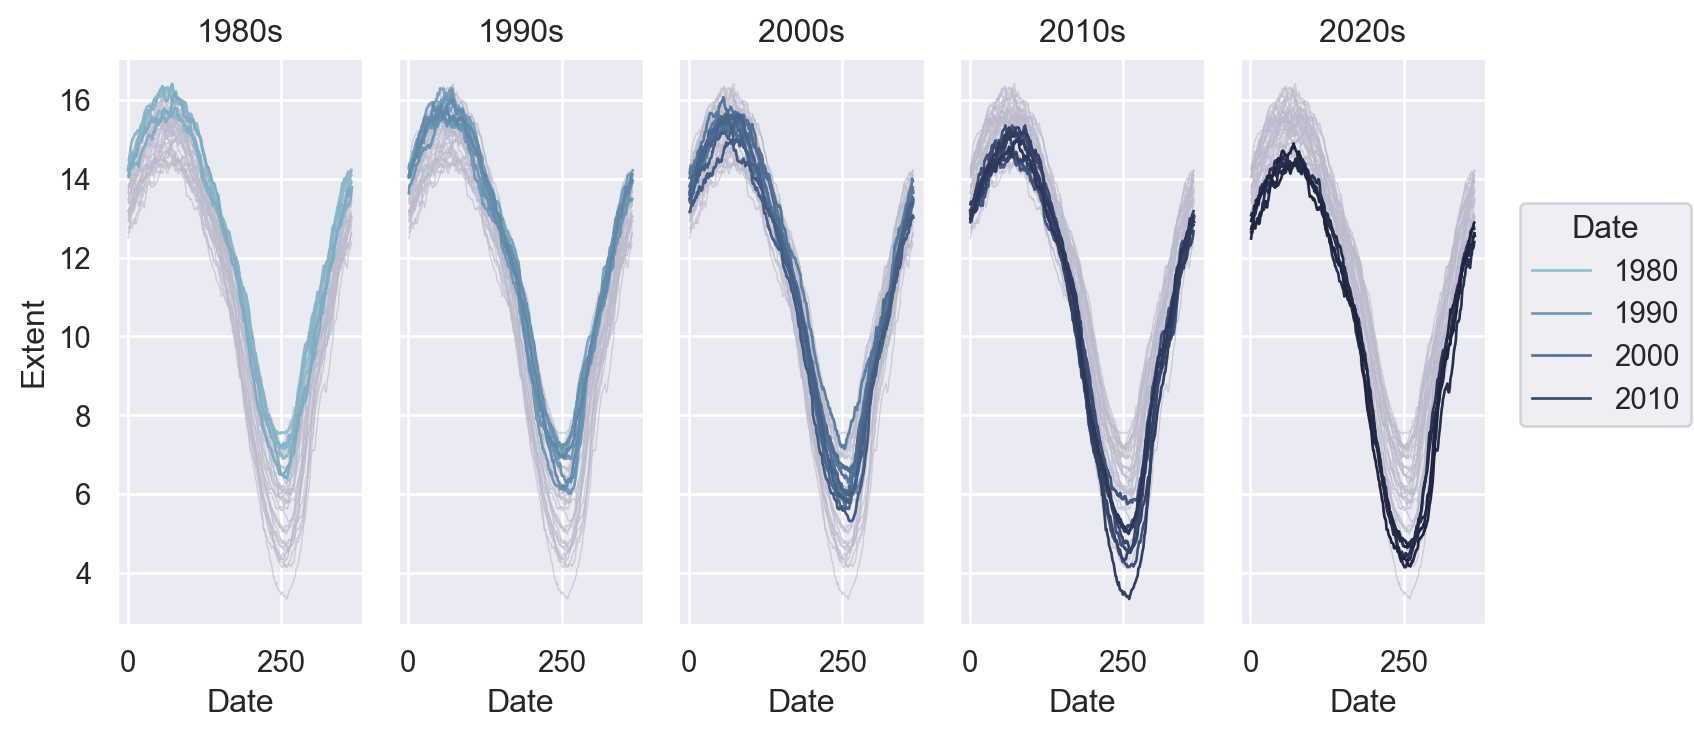

In [53]:
#Compared to Line, this mark offers fewer settable properties, 
#but it can have better performance when drawing a large number of lines
(
    so.Plot(
        x=df["Date"].dt.day_of_year,
        y=df["Extent"],
        color=df["Date"].dt.year
    )
    .facet(df["Date"].dt.year.round(-1))
    .add(so.Lines(linewidth=.5, color="#bbca"), col=None)
    .add(so.Lines(linewidth=1))
    .scale(color="ch:rot=-.2,light=.7")
    .layout(size=(8, 4))
    .label(title="{}s".format)
)